# This reads most recent iTunes reviews for the Zelle Purple app 

    - Reading customer reviews in JSON format, 
    - from the iTunes Store API,
    - using pandas python for data mining,
    - and outputs several word-cloud images

Created on 2019 Mar 1 by Edwin Campos

Last modification 2019 Mar 20 by ecampos.phd@gmail.com

In [1]:
# Dependencies
import pandas as pd
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Global variables
URL = 'http://itunes.apple.com/rss/customerreviews/id=1260755201/sortby=mostrecent/json'

In [3]:
# Ingest inputs
#response = requests.get(url)
df = pd.read_json(URL)#, orient='columns')
print(df)

                                                      feed
author   {'name': {'label': 'iTunes Store'}, 'uri': {'l...
entry    [{'author': {'uri': {'label': 'https://itunes....
icon      {'label': 'http://itunes.apple.com/favicon.ico'}
id       {'label': 'http://itunes.apple.com/rss/custome...
link     [{'attributes': {'rel': 'alternate', 'type': '...
rights              {'label': 'Copyright 2008 Apple Inc.'}
title          {'label': 'iTunes Store: Customer Reviews'}
updated             {'label': '2019-03-20T11:07:26-07:00'}


In [4]:
# Time stamp is not available for particular reviews, but for 10-pages aggregates
time_stamp = df.feed.updated['label']
print(time_stamp)

2019-03-20T11:07:26-07:00


In [5]:
#print(df.feed.entry)
reviews_df = pd.DataFrame()
for review in df.feed.entry:
    version= review['im:version']['label']
    rating = review['im:rating']['label']
    title  = review['title']['label']
    content= review['content']['label']
    
    data_dict = {'version': version, 'rating': int(rating),
                 'title': title,'content': content
                }
    #print(data_dict)
    new_row_pd = pd.Series(data_dict)
    '''
    new_row_pd = pd.Series({'version': version, 
                               'rating': rating,
                               'title': title,
                               'content': content
                              })
    '''
    #print(new_row_pd)
  
    reviews_df = reviews_df.append(new_row_pd, ignore_index=True)


In [6]:
print(reviews_df)

                                              content  rating  \
0                            Super simple! I love it!     5.0   
1   Don’t use this app. Scammers use it to rip you...     1.0   
2                              So easy and convenient     5.0   
3   Zelle actually works instantly. It great to fi...     5.0   
4   Wow so all that happens after entering my card...     1.0   
5   I only tried this because someone sent me some...     1.0   
6   As I said terrible customer service. I would r...     1.0   
7                               Easy and fast service     5.0   
8   Got locked out of the app and when I called I ...     1.0   
9   It’s 2019 and this app does not allow copy pas...     1.0   
10                                         So awesome     5.0   
11             Best app to send money! Easy peezy 💰💨💨     5.0   
12  Unable to reset password. Called several times...     1.0   
13  I sent two payments that never got through to ...     1.0   
14                       

In [7]:
# Separate Positive and Negative Reviews
positive_reviews_df = reviews_df[reviews_df['rating'] >= 4]
count_positive_reviews = len(positive_reviews_df)
negative_reviews_df = reviews_df[reviews_df['rating'] <= 2]
count_negative_reviews = negative_reviews_df.shape[0]
sentiment_summary_text = ' %i positive reviews and %i negative reviews.' %\
                          (count_positive_reviews, count_negative_reviews)
print(sentiment_summary_text )


 24 positive reviews and 24 negative reviews.


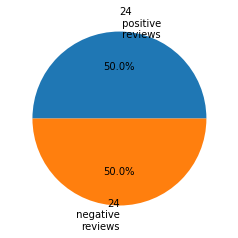

In [8]:
# Create a pie plot to see if the distribution is unbalanced
labels = str(count_positive_reviews)+'\n positive\n reviews', str(count_negative_reviews)+'\n negative\nreviews'
sizes = [count_positive_reviews, count_negative_reviews]
#plt.style.use('ggplot')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig('./AnalyzeSentimentDistrib.png')
plt.show()  
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

In [9]:
print(positive_reviews_df)

                                              content  rating  \
0                            Super simple! I love it!     5.0   
2                              So easy and convenient     5.0   
3   Zelle actually works instantly. It great to fi...     5.0   
7                               Easy and fast service     5.0   
10                                         So awesome     5.0   
11             Best app to send money! Easy peezy 💰💨💨     5.0   
14                                                🔥🔥🔥     5.0   
15  Lightning fast and so easy after set up! Free!...     5.0   
17  The most amazing asset this app provides is th...     5.0   
18                     Incredibly easy money transfer     5.0   
19                                Easy and convenient     5.0   
20  I wish it’s possible to deposit to send money ...     5.0   
22                      Simple set up and easy to use     5.0   
24  If you need to send money quickly and safely t...     5.0   
25                       

In [10]:
# Tokenization: Split text into tokens, in this case into individual words.
# Extract positive words
positive_words_string = positive_reviews_df.content.str.cat(sep=' ')
# Extract negative words
negative_words_string = negative_reviews_df.content.str.cat(sep=' ')

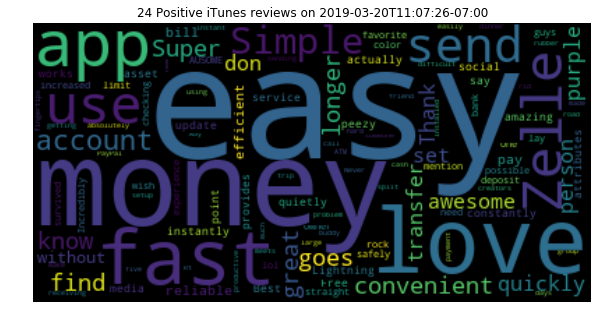

In [11]:
# Plot word-cloud image for Positive Reviews
positive_wordcloud = WordCloud().generate(positive_words_string)

plt.figure(figsize=(10,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('%i Positive iTunes reviews on %s' % (count_positive_reviews, time_stamp) )
plt.savefig('./AnalyzeSentimentPositive.png')
plt.show()
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

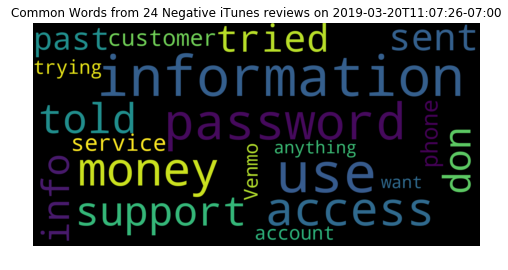

In [12]:
# Plot word-cloud image for Negative Reviews, with custom arguments
from wordcloud import STOPWORDS  # This contains trivial words to ignore
my_stop_words = set(['zelle', 'bank', 'app']) | STOPWORDS 
negative_wordcloud = WordCloud(width=1600, height=800, 
                               max_font_size=200,
                               max_words=20, 
                               stopwords=my_stop_words,
                              ).generate(negative_words_string)

plt.figure(figsize=(8,8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Common Words from %i Negative iTunes reviews on %s' % (count_negative_reviews, time_stamp) )

plt.savefig('./AnalyzeSentimentNegative.png')
plt.show()  
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

## Compute Term-Frequency Inverse-Document-Frequency (TF IDF) metric

For a tutorial on the theory of TF-IDF, see for example section 2.2.2 in https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf

    from sklearn.feature_extraction.text import TfidfVectorizer

Remember to vectorize the word counts: Use a CountVectorizer, which converts a collection of text documents to a matrix of the counts of occurences of each word in the document.

Remember to sort the input (word, weight) by descending weights.

In [13]:
# Compute TF-IDF weights for POSITIVE Reviews
tfidfWords = TfidfVectorizer()
tfidfWords.fit_transform(positive_reviews_df.content)
tfidf_poswords_weights_dict = {'words':tfidfWords.get_feature_names(), 
                               'weights':tfidfWords.idf_}
#print(tfidf_poswords_weights_dict)

In [14]:
# Generate Pandas dataframes with the TF-IDF values
tfidf_poswords_weights_df = pd.DataFrame(tfidf_poswords_weights_dict)
print(tfidf_poswords_weights_df.head(10))
tfidf_poswords_weights_df_sorted = tfidf_poswords_weights_df.sort_values(by=['weights'],
                                                                         ascending=False)
print(tfidf_poswords_weights_df_sorted.head(10))

        words   weights
0       about  3.525729
1  absolutely  3.525729
2     account  3.120264
3    accounts  3.525729
4    actually  3.525729
5       after  3.525729
6        also  3.525729
7     amazing  3.525729
8          an  3.525729
9         and  1.579818
          words   weights
0         about  3.525729
65   incredibly  3.525729
108     problem  3.525729
107    possible  3.525729
106       point  3.525729
104       peezy  3.525729
103      paypal  3.525729
102     payment  3.525729
101         pay  3.525729
100       owner  3.525729


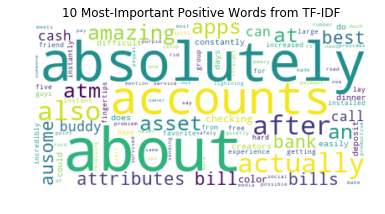

In [15]:
# Create image for Positive Reviews, with word size based on TF-IDF weight
poswords_dict = dict(zip(tfidf_poswords_weights_df['words'], 
                         tfidf_poswords_weights_df['weights'])
                    )
positive_wordcloud_tfidf = WordCloud(max_words=100, 
                                     background_color='white'
                                    ).generate_from_frequencies(poswords_dict) 

plt.figure()
plt.title("10 Most-Important Positive Words from TF-IDF")
plt.imshow(positive_wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentPositiveTFIDF.png')
plt.show()

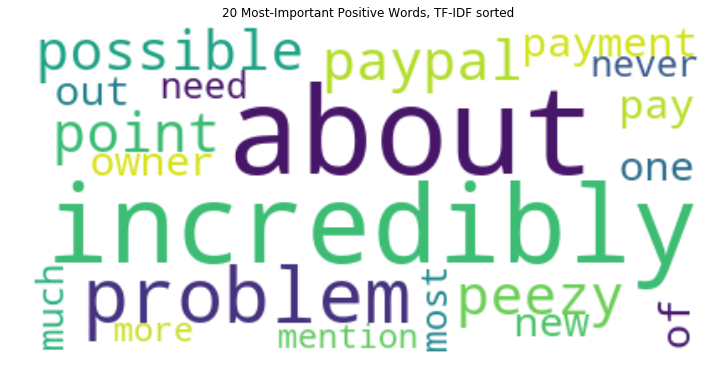

In [16]:
# Create image for Positive Reviews, with words sorted by weights
poswords_sort_dict = dict(zip(tfidf_poswords_weights_df_sorted['words'], 
                              tfidf_poswords_weights_df_sorted['weights'])
                         )
# Create image for Positive Reviews, with word size based on TF-IDF weight
positive_wordcloud_tfidf_sort = WordCloud(max_words=20, 
                                          background_color='white'
                                         ).generate_from_frequencies(poswords_sort_dict) 

plt.figure(figsize=(12,8))
plt.title("20 Most-Important Positive Words, TF-IDF sorted")
plt.imshow(positive_wordcloud_tfidf_sort, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentPositiveTFIDF_sort.png')
plt.show()

In [17]:
# Compute TF-IDF weights for NEGATIVE Reviews
tfidfWords = TfidfVectorizer()
tfidfWords.fit_transform(negative_reviews_df.content)
tfidf_negwords_weights_dict = {'words':tfidfWords.get_feature_names(), 
                               'weights':tfidfWords.idf_}
#print(tfidf_negwords_weights_dict)

In [18]:
tfidf_negwords_weights_df = pd.DataFrame(tfidf_negwords_weights_dict)
print(tfidf_negwords_weights_df.head(10))

tfidf_negwords_weights_df_sorted = tfidf_negwords_weights_df.sort_values(by=['weights'],
                                                                         ascending=False)
print(tfidf_negwords_weights_df_sorted.head(10))

       words   weights
0        120  3.525729
1        150  3.525729
2       2019  3.525729
3       able  3.525729
4     access  2.609438
5  accessing  3.525729
6    account  2.832581
7   achieved  3.525729
8     advice  3.525729
9      after  2.427116
          words   weights
0           120  3.525729
256     provide  3.525729
254     process  3.525729
253  procedures  3.525729
251    previous  3.525729
249      please  3.525729
248      places  3.525729
247     picture  3.525729
246         pic  3.525729
243      person  3.525729


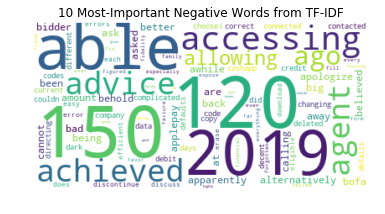

In [19]:
# Plot 100 rare words from TF-IDF 
negwords_dict = dict(zip(tfidf_negwords_weights_dict['words'], 
                         tfidf_negwords_weights_dict['weights'])
                    )
negative_wordcloud_tfidf = WordCloud(max_words=100, 
                                     background_color='white'
                                    ).generate_from_frequencies(negwords_dict) 
plt.figure()
plt.title("10 Most-Important Negative Words from TF-IDF")
plt.imshow(negative_wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentNegativeTFIDF.png')
plt.show()

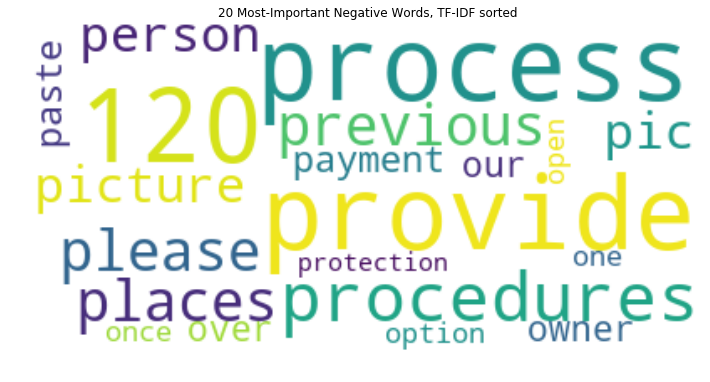

In [20]:
# Create image for Negative Reviews, with words sorted by weights
negwords_sort_dict = dict(zip(tfidf_negwords_weights_df_sorted['words'], 
                              tfidf_negwords_weights_df_sorted['weights'])
                         )
# Create image for Negative Reviews, with word size based on TF-IDF weight
negative_wordcloud_tfidf_sort = WordCloud(max_words=20, 
                                          background_color='white'
                                         ).generate_from_frequencies(negwords_sort_dict) 
plt.figure(figsize=(12,8))
plt.title("20 Most-Important Negative Words, TF-IDF sorted")
plt.imshow(negative_wordcloud_tfidf_sort, interpolation='bilinear')
plt.axis('off')
plt.savefig('./AnalyzeSentimentNegativeTFIDF_sort.png')
plt.show()

## Future Work
1. In another notebook (PredictSentiment), I will train a Logistic Regression model to predict sentiment.